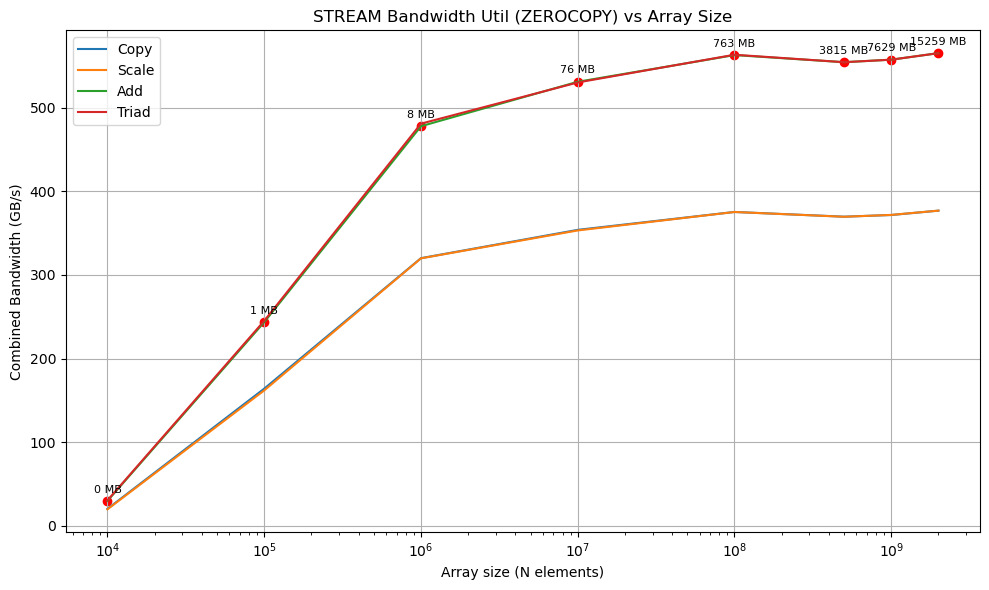

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("zerocopy.csv")

# Convert all columns except header to numeric (coerce errors to NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN (if parsing failed)
df = df.dropna()

# Combine read+write for plotting
df['Copy_Total']  = df['Copy_Read']  + df['Copy_Write']
df['Scale_Total'] = df['Scale_Read'] + df['Scale_Write']
df['Add_Total']   = df['Add_Read']   + df['Add_Write']
df['Triad_Total'] = df['Triad_Read'] + df['Triad_Write']

# Add new column: size per array in MB (each element is 8 bytes)
df['Array_Size_MB'] = (df['N'] * 8) / (1024 ** 2)

plt.figure(figsize=(10,6))
plt.plot(df['N'].values, df['Copy_Total'].values, label="Copy")
plt.plot(df['N'].values, df['Scale_Total'].values, label="Scale")
plt.plot(df['N'].values, df['Add_Total'].values, label="Add")
plt.plot(df['N'].values, df['Triad_Total'].values, label="Triad")

# Add scatter points and labels on the Add line
for i, (x, y, size) in enumerate(zip(df['N'].values, df['Add_Total'].values, df['Array_Size_MB'].values)):
    plt.scatter(x, y, color='red')  # scatter point
    plt.text(x, y + 10, f"{size:.0f} MB", fontsize=8, ha='center')  # label above the point

plt.xscale('log')
plt.xlabel("Array size (N elements)")
plt.ylabel("Combined Bandwidth (GB/s)")
plt.title("STREAM Bandwidth Util (ZEROCOPY) vs Array Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
